In [2]:

using DataFrames, Gadfly, RDatasets


In [4]:
Dsleep = dataset("ggplot2", "msleep")
Dsleep = dropmissing!(Dsleep[[:Vore,:BrainWt,:BodyWt,:SleepTotal, :Awake]])

Dsleep[:SleepTime] = Dsleep[:SleepTotal] .> 8
head(Dsleep)

,Vore,BrainWt,BodyWt,SleepTotal,Awake,SleepTime
1,omni,0.0155,0.48,17.0,7.0,true
2,omni,0.00029,0.019,14.9,9.1,true
3,herbi,0.423,600.0,4.0,20.0,false
4,carni,0.07,14.0,10.1,13.9,true
5,herbi,0.0982,14.8,3.0,21.0,false
6,herbi,0.115,33.5,5.3,18.7,false



# Scales

## 1.0 Introduction

`Aesthetics` such as `color` are visualizations of numerical or discrete values.   
A `Scale` gives us control over these numerical or discrete values.  
The following table shows an `aesthetic`, and the `scale` associated with it.
e.g. the scale associated with the `shape` aesthetic is `Scale.shape_discrete()`. 
  
$~$    

  

$\begin{array}{|l|l|l|}
\hline
Aesthetic\qquad & Scale. & Guide. \\
\hline
& \quad Discrete and Continuous Scales & \\
x & \text{x_discrete} &  \\
 & \text{x_continuous} & \\
y & \text{y_discrete} &  \\
 & \text{y_continuous} & \\
color & \text{color_discrete} & \text{colorkey} \\
 & \text{color_continous} & \text{colorkey} \\
 & \text{color_none} & \text{} \\
 size & \text{size_discrete} & \text{sizekey} (tbd) \\
 & \text{size_continuous} & \text{sizekey} (tbd) \\
 & &  \\
& \qquad Discrete~Scales & \\
group & \text{group_discrete} & \text{} \\
shape & \text{shape_discrete} & \text{shapekey} (tbd)\qquad \\
xgroup & \text{xgroup} & \text{} \\
ygroup & \text{ygroup} & \text{} \\
 & &  \\
\hline
\end{array}$



We'll start with the discrete scales only category, because they have common arguments.


## 2.0 Aesthetics with Discrete Scales


In [5]:

# Data
geyser = dataset("datasets","faithful")
geyser[:g] = geyser[:Eruptions].>3.0
head(geyser)


,Eruptions,Waiting,g
1,3.6,79,true
2,1.8,54,false
3,3.333,74,true
4,2.283,62,false
5,4.533,85,true
6,2.883,55,false



### Arguments
**Scale.name_discrete(labels= , levels= , order= )**

### levels and order

The `levels` and `order` argument ...

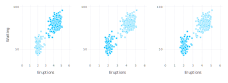

In [4]:

# Example 1

coord = Coord.cartesian(ymin=35, ymax=100)
myTheme = Theme(point_shapes=[Shape.circle, Shape.xcross])
ylab = Guide.ylabel(nothing)

pa = plot(geyser, coord, x=:Eruptions, y=:Waiting,  shape=:g, Geom.point, myTheme )

pb = plot(geyser, coord, x=:Eruptions, y=:Waiting,  shape=:g, Geom.point,
    Scale.shape_discrete(levels=[false, true]), myTheme, ylab)

pc = plot(geyser, coord, x=:Eruptions, y=:Waiting,  shape=:g, Geom.point,
    Scale.shape_discrete(order=[2, 1]), myTheme, ylab)

draw(SVG(9inch,3.3inch), hstack(pa, pb, pc))

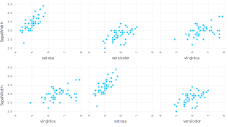

In [6]:

# Example 2

iris = dataset("datasets", "iris")
sp = unique(iris[:Species])
myTheme = Theme(plot_padding=[0mm])

pd = plot(iris, xgroup=:Species,  y=:SepalWidth,
        Geom.subplot_grid(layer(x=:SepalLength,Geom.point)), myTheme
)

pe = plot(iris, xgroup=:Species,  y=:SepalWidth,
        Geom.subplot_grid(layer(x=:SepalLength, Geom.point)),
    Scale.xgroup(levels=["virginica","setosa","versicolor"]), myTheme
)

draw(SVG(9inch,5inch), vstack(pd,pe))

### labels

The labels argument ...   
The labels argument for `Scale.shape_discrete` and `Scale.size_discrete` will work only when a guide has been implemented for these scales (`Guide.shapekey` and `Guide.sizekey`). 

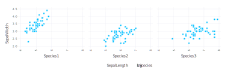

In [7]:

labelDict = Dict(i => j for (i, j) in zip(sp, "Species".*["1","2","3"]))

pf = plot(iris, xgroup=:Species, x=:SepalLength,  y=:SepalWidth,
        Geom.subplot_grid(layer(Geom.point)),
    Scale.xgroup(labels = x->labelDict[x])        
)

draw(SVG(9inch,3inch), pf)


## 3.0 Aesthetics with discrete & continuous scales 


### Arguments
**Scale.name_discrete(labels= , levels= , order= )**  
**Scale.name_continuous(labels= , minvalue= , maxvalue= , ... )**


